In [1]:
from pathlib import Path

import torch.utils.data
import torchvision
from sklearn.metrics import ConfusionMatrixDisplay

from extended_torch import one_hot_decode
from extended_torch.datasets import CIFAR10, CIFAR10Images
from extended_torch.monitors import (
    EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
)
from extended_torch.losses import CrossEntropy
from extended_torch.metrics import Accuracy
from extended_torch.models import Model

In [2]:
CHECKPOINT_DIR = Path("checkpoint")
MODEL_PATH = CHECKPOINT_DIR / "model.pth"
OPTIMIZER_PATH = CHECKPOINT_DIR / "optimizer.pth"
DATA_DIR = Path("data")

In [3]:
N_CLASSES = 10
BATCH_SIZE = 256
LEARNING_RATE = 1e-3
N_EPOCHS = 100

In [4]:
train_set = CIFAR10(DATA_DIR, train=True)
valid_set = CIFAR10(DATA_DIR, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
image, label = train_set[0]

In [6]:
image.shape, label.shape

(torch.Size([3, 32, 32]), torch.Size([10]))

In [7]:
train_loader = torch.utils.data.DataLoader(train_set, BATCH_SIZE)
valid_loader = torch.utils.data.DataLoader(valid_set, BATCH_SIZE)

In [8]:
input_batch, target_batch = next(iter(train_loader))

In [9]:
input_batch.shape, target_batch.shape

(torch.Size([256, 3, 32, 32]), torch.Size([256, 10]))

In [10]:
net = torchvision.models.mobilenet_v3_small(num_classes=N_CLASSES)

In [11]:
net

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [12]:
with torch.no_grad():
    print(net(torch.randn(32, 3, 32, 32)).shape)

torch.Size([32, 10])


In [13]:
loss = CrossEntropy()
trainable_params = [
    param for param in net.parameters() if param.requires_grad
]
optimizer = torch.optim.Adam(trainable_params, LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.5, patience=0
)
metrics = [Accuracy()]
monitors = [
    EarlyStopping(loss, patience=2),
    ModelCheckpoint(loss, MODEL_PATH, OPTIMIZER_PATH),
    ReduceLROnPlateau(scheduler, loss),
]

In [14]:
model = Model(net, loss, optimizer, metrics, monitors)

In [15]:
model.train(train_loader, valid_loader, N_EPOCHS)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [16]:
model.net.load_state_dict(torch.load(MODEL_PATH))
model.optimizer.load_state_dict(torch.load(OPTIMIZER_PATH))

In [17]:
model.test(valid_loader)

  0%|          | 0/40 [00:00<?, ?it/s]

In [18]:
image_set = CIFAR10Images(DATA_DIR, train=False)
image_loader = torch.utils.data.DataLoader(image_set, BATCH_SIZE)

Files already downloaded and verified


In [19]:
labels = torch.cat([target_batch for _, target_batch in valid_loader])
predictions = model.predict(image_loader)

In [20]:
labels.shape, predictions.shape

(torch.Size([10000, 10]), torch.Size([10000, 10]))

In [21]:
decoded_labels = one_hot_decode(labels).to("cpu")
decoded_predictions = one_hot_decode(predictions).to("cpu")

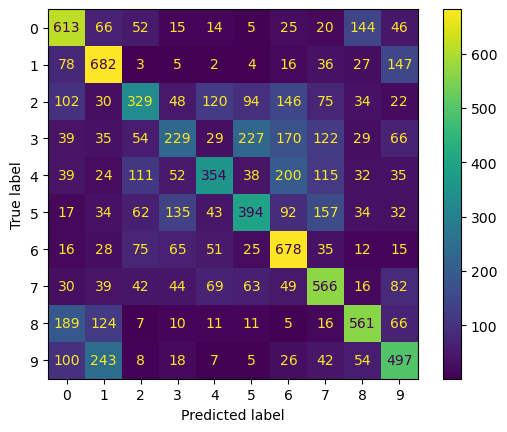

In [22]:
ConfusionMatrixDisplay.from_predictions(
    decoded_labels, decoded_predictions
)